Analysis of model regression of IBM simulated data.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from foqal.utils.io import IO

In [4]:
io = IO.directory(
        folder="ibmq-simulator_bell-state_local-projections_depolarized-channel",
        include_date=False, include_id=False, verbose=False,
    )

df = io.load_dataframe("summary_of_fitting.txt")
df

,model,m,p,latent_dim,train_loss,test_loss,t,lr,n_steps
0,ClassicalCommonCause,5,0.0,50,0.000815,0.000852,1.056077,0.25,300
1,Superdeterminism,5,0.0,50,0.000006,0.000030,1.753675,0.25,300
2,Superluminal,5,0.0,50,0.000005,0.000033,1.180658,0.25,300
3,QuantumCommonCause,5,0.0,2,0.000013,0.000025,4.041414,0.25,300
4,ClassicalCommonCause,5,0.1,50,0.000276,0.000282,1.120436,0.25,300
...,...,...,...,...,...,...,...,...,...
215,QuantumCommonCause,30,0.9,2,0.000101,0.000103,2.980202,0.25,300
216,ClassicalCommonCause,30,1.0,50,0.000013,0.000024,1.166922,0.25,300
217,Superdeterminism,30,1.0,50,0.000009,0.000029,1.772805,0.25,300
218,Superluminal,30,1.0,50,0.000006,0.000030,1.209688,0.25,300


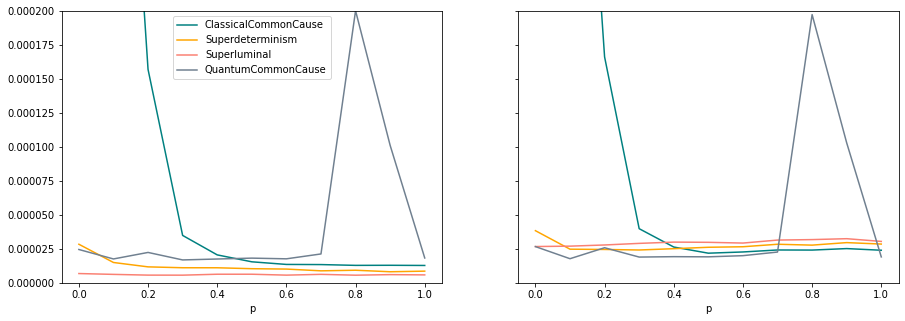

In [10]:
models = df['model'].unique()
colors = ['teal', 'orange', 'salmon', 'slategrey']

# ms = df['m'].unique()
ms = (30, )
ps = df['p'].unique()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[15, 5], sharey='row')
for model, color in zip(models, colors):
    for m in ms:
        train = []
        test = []
        test_std = []
        for p in ps:
            dfi = df[(df['model']==model) & (df['m'] == m) & (df['p'] == p)]
            train.append(dfi[f'train_loss'].item())
            test.append(dfi[f'test_loss'].item())
            # test_std.append(dfi[f'test_std'].item())

        axs[0].plot(ps, train, color=color, label=f"{model}")
        axs[1].plot(ps, test, color=color)
        # axs[1].fill_between(ps, np.array(test)-np.array(test_std), np.array(test)+np.array(test_std), color=color, alpha=0.3)

axs[0].legend()
for ax in axs:
    ax.set(xlabel='p')
    ax.set(ylim=[0, 0.0002])
    # ax.set_yscale('log')